In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target
# Convert to DataFrame for easy handling
df = pd.DataFrame(X, columns=diabetes_data.feature_names)
df['target'] = y

# Check for missing values
print(df.isnull().sum())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


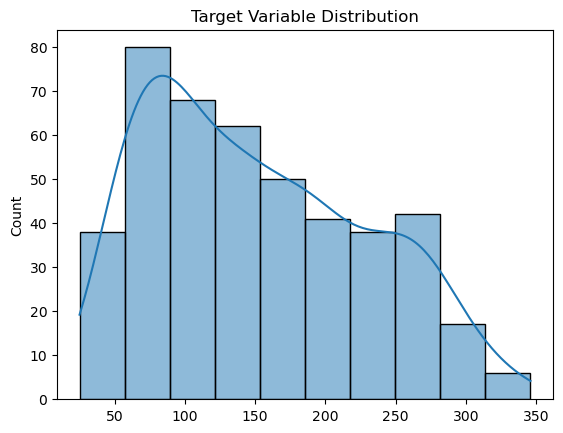

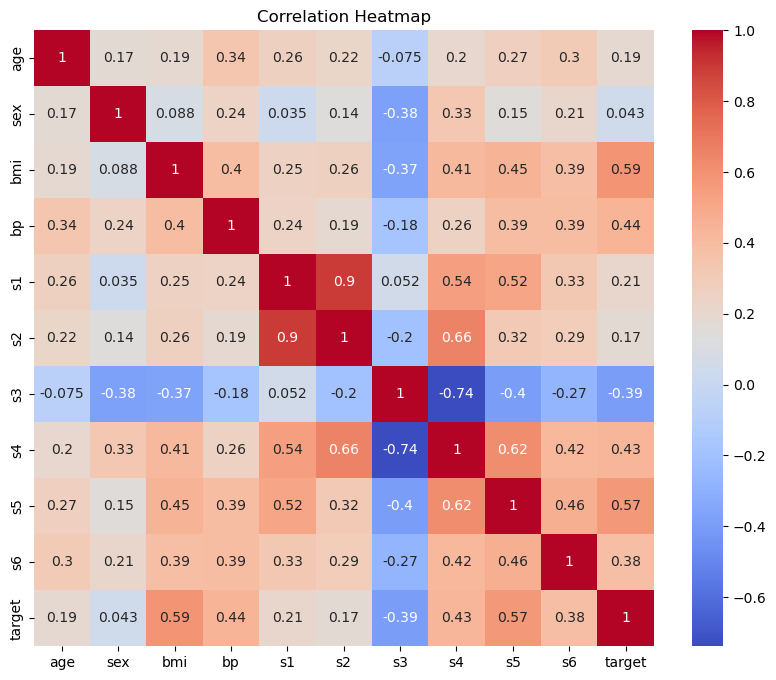

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.histplot(y, kde=True)
plt.title('Target Variable Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, input_shape=(X_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])



C:\Users\rinto\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)



Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2699.9922 - mse: 2699.9922 - val_loss: 2795.1880 - val_mse: 2795.1880
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2950.3184 - mse: 2950.3184 - val_loss: 2800.2380 - val_mse: 2800.2380
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2686.0435 - mse: 2686.0435 - val_loss: 2790.5061 - val_mse: 2790.5061
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2771.3765 - mse: 2771.3765 - val_loss: 2795.2058 - val_mse: 2795.2058
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2613.8337 - mse: 2613.8337 - val_loss: 2793.3291 - val_mse: 2793.3291
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2779.8247 - mse: 2779.8247 - val_loss: 2795.3047 - val_mse: 2795.3047
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2749.3987 - mse: 2749.3987 - val_loss: 2804.8000 - val_mse: 2804.8000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2791.2681 - mse: 2791.2681 - val_loss: 2800.58

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Mean Squared Error: 2975.5154240962715
R² Score: 0.4383861457102718


In [7]:
# New model with additional layers
model_improved = Sequential([
    Dense(128, input_shape=(X_scaled.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the new model
model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the new model
history_improved = model_improved.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the new model
y_pred_improved = model_improved.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved Mean Squared Error: {mse_improved}")
print(f"Improved R² Score: {r2_improved}")


Epoch 1/100


C:\Users\rinto\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 32133.3047 - mse: 32133.3047 - val_loss: 22209.3887 - val_mse: 22209.3887
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31134.7949 - mse: 31134.7949 - val_loss: 21832.4727 - val_mse: 21832.4727
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29161.5664 - mse: 29161.5664 - val_loss: 21198.8125 - val_mse: 21198.8125
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 29416.2012 - mse: 29416.2012 - val_loss: 20116.2656 - val_mse: 20116.2656
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26028.0078 - mse: 26028.0078 - val_loss: 18304.9824 - val_mse: 18304.9824
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25838.4707 - mse: 25838.4707 - val_loss: 15611.1650 - val_mse: 15611.1650
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20617.0449 - mse: 20617.0449 - val_loss: 11994.5303 - val_mse: 11994.5303
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15986.7021 - mse: 15986.7021 -